# Exercise round 6

## Exercise 1

In [33]:
%matplotlib inline
import numpy as np
import scipy.linalg as linalg
import scipy.integrate as integrate
import math

eta = 1
k = 2
m = 1.0
tmp = (eta/m)**2 - 4*k/m
print(tmp)

-7.0


In [34]:
A = 1
B = 1
t = np.linspace(0,10,100)
if tmp > 0:
    a = 0.5 * (-eta/m + math.sqrt(eta**2/m**2 - 4*k/m))
    b = 0.5 * (-eta/m - math.sqrt(eta**2/m**2 - 4*k/m))
    p = A * np.exp(a * t) + B * np.exp(b * t)
elif tmp < 0:
    a = -0.5 * eta/m
    b = 0.5 * math.sqrt(4*k/m - eta**2/m**2)
    p = A * np.exp(a * t) * np.cos(b * t) + B * np.exp(a * t) * np.sin(b * t)
else:
    assert(False)


In practice we usually fix $p(0) = p_0$ and $v(0) = v_0$, then we should have $A + B = p_0$ and $A a + B b = v_0$ on the first case and $A = p_0$ and $A a + B b = v_0$.

In [36]:
if tmp > 0:
    p0 = A + B
    v0 = A*a + B*b
else:
    p0 = A
    v0 = A*a + B*b
print(v0)

0.8228756555322954


In [37]:
import matplotlib.pyplot as plt

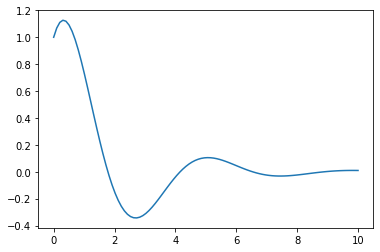

In [38]:
plt.clf()
plt.plot(t,p)

## Exercise 2

In [39]:
MA = np.array([[0,1], [-k/m,-eta/m]])
#print(np.exp(A))
print(linalg.expm(MA))

[[ 0.37107355  0.44447552]
 [-0.88895103 -0.07340196]]


In [40]:
x0 = np.array([p0,v0])
x = np.zeros((t.shape[0],2))
for i in range(t.shape[0]):
    x[i,:] = linalg.expm(MA*t[i])@x0

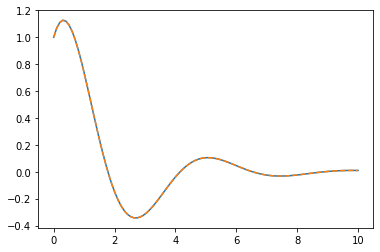

In [41]:
plt.clf()
plt.plot(t,x[:,0],t,p,'--')

## Exercise 3

Euler method for ODE
$$
  dx(t)/dt = f(x,t) + u(t)
$$
is given by
$$
 x(t + \Delta t) = x(t) + [f(x,t) + u(t)] \, \Delta t 
$$


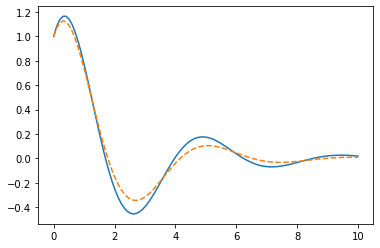

In [44]:
dt = t[1] - t[0]
x_euler = np.zeros((t.shape[0],2))
cx = x0
x_euler[0,:] = cx
for i in range(1,t.shape[0]):
    cx = cx + (MA @ cx) * dt
    x_euler[i,:] = cx

plt.clf()
plt.plot(t,x_euler[:,0],t,p,'--')

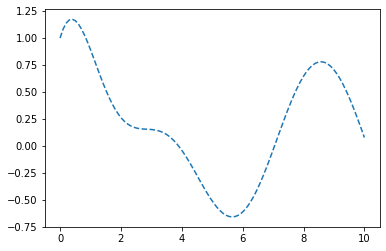

In [51]:
u = lambda t: math.sin(t)
Bu = np.array([0,1])

dt = t[1] - t[0]
x_euler = np.zeros((t.shape[0],2))
cx = x0
x_euler[0,:] = cx
for i in range(1,t.shape[0]):
    cx = cx + (MA @ cx + Bu * u(t[i])) * dt
    x_euler[i,:] = cx

plt.clf()
plt.plot(t,x_euler[:,0],'--')

In [54]:
x0 = np.array([p0,v0])
x = np.zeros((t.shape[0],2))
for i in range(t.shape[0]):
    disc_u = np.zeros(x.shape[1])
    for j in range(x.shape[1]):
        val, err = integrate.quad(lambda s: (linalg.expm(MA*(t[i]-s))@Bu*u(s))[j],0,t[i])
        disc_u[j] = val
    x[i,:] = linalg.expm(MA*t[i])@x0 + disc_u

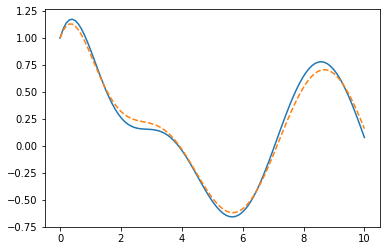

In [55]:
plt.clf()
plt.plot(t,x_euler[:,0],t,x[:,0],'--')

In [56]:
def f(x,t):
    return MA@x + Bu*u(t)


In [57]:
x_odeint = integrate.odeint(f,x0,t)

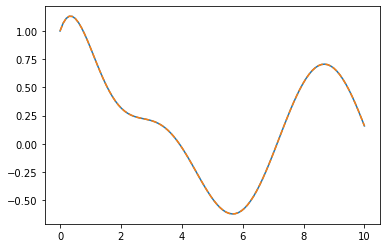

In [58]:
plt.clf()
plt.plot(t,x_odeint[:,0],t,x[:,0],'--')